Importing the libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

Data collection and processing

In [3]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1. Positive correlation - directly proportional
2. Negative correlation - inversely proportional

In [11]:
correlation=gold_data.drop('Date',axis=1).corr()

<Axes: >

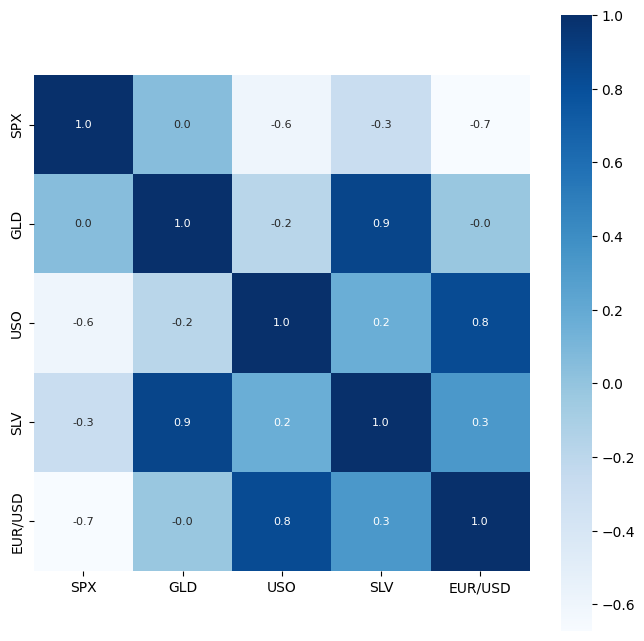

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

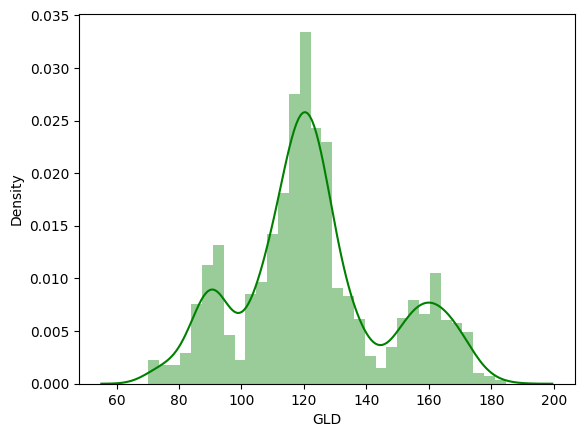

In [14]:
sns.distplot(gold_data['GLD'],color='green')

Splitting the features and target

In [16]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [17]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting training data and test data

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

Random Forest Regressor

In [22]:
regressor=RandomForestRegressor(n_estimators=100)

In [23]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation

In [24]:
test_data_prediction=regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.37849934  82.26079962 115.96070019 127.75120076 120.76870126
 154.72389737 150.49149834 126.25790027 117.56849888 125.98900085
 116.56730096 171.9685007  141.50739871 167.63999834 115.11500037
 117.60380052 138.75400268 170.32770115 159.38830284 157.77599918
 155.16320001 125.19619997 175.41969936 157.13610337 125.23270046
  93.89799972  78.10430011 120.58010017 119.13609937 167.45719932
  88.03170051 125.18600014  91.10710083 117.67870051 121.12429896
 136.08590066 115.55250106 115.71020088 147.18639941 107.31580059
 104.2828025   87.23589802 126.60040069 117.9839996  152.90079928
 119.62629997 108.35659971 107.86169797  93.11490019 127.17129757
  75.45979994 113.60829927 121.42610021 111.15569901 118.90049888
 120.61649971 158.81280022 171.12730091 146.99409634  85.87259882
  94.45350039  86.76409868  90.53680007 119.01820049 126.51140073
 127.40279976 170.0177003  122.34449954 117.39989898  98.1483005
 168.1640012  142.8735978  132.59710229 121.1486019  120.86599923
 119.619100

In [28]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.9889627877125958


Compare the actual values and predicted values in a plot

In [29]:
Y_test=list(Y_test)

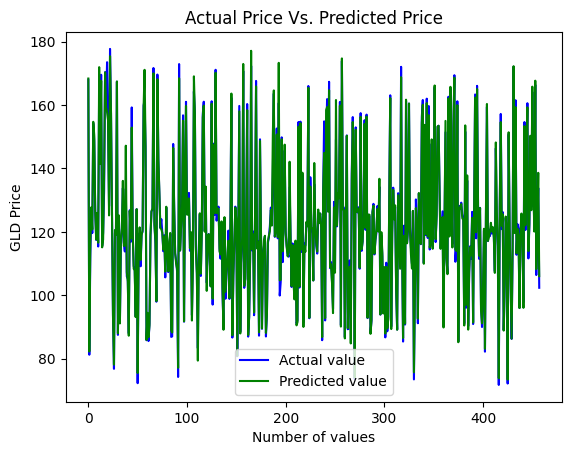

In [30]:
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title('Actual Price Vs. Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()